
# <span style="color:rgb(213,80,0)">**Determination of total property damage in the seven states most affected by Hurricane Harvey between August 17th and September 3rd, 2017**</span>

#### Step 1:
#### Creating an import function y to import the "stormevents\_2017\_finalproject.csv" file which include CZ\_Name variable

In [1]:
% importing stormevents_2017_finalproject.csv file into the live editor
y = importfile("stormevents_2017_finalproject.csv");

#### Step 2:
#### Filtering the table to include only seven states: Arkansas, Kentucky, Louisiana, Mississippi, North Carolina, Tennessee, and Texas.

In [2]:
% filtering the table y to show data related to only seven states
y_seven_states = y(ismember(y.State,{'ARKANSAS','KENTUCKY','LOUISIANA','MISSISSIPPI','NORTH CAROLINA','TENNESSEE','TEXAS'}),:);


#### Step 3:
#### Filtering the table further to include only events that start between August 17th and September 3rd (both inclusive)

In [3]:
% Filter by date range (adjust column name as needed)
start_date = datetime('2017-08-17');
end_date = datetime('2017-09-03');

% Assuming the date column is called 'Begin_Date' - change if different
date_column = 'Begin_Date_Time'; % Adjust this based on your actual column name


% Filter for Hurricane Harvey period
harvey_mask = y_seven_states.(date_column) >= start_date & ...
              y_seven_states.(date_column) <= end_date;
y_harvey = y_seven_states(harvey_mask, :)

#### Step 4:
#### Total property cost for each state to determine the states with the most damage

In [4]:
% Compute group summary
total_property_cost_by_state = groupsummary(y_harvey,"State","sum","Property_Cost");
total_property_cost_by_state = sortrows(total_property_cost_by_state, "sum_Property_Cost", "descend")

In [5]:

total_property_cost_by_state = sortrows(total_property_cost_by_state, "sum_Property_Cost", "descend")



#### Step 5:
#### Total property cost for each unique county to determine the regions within the states most impacted

In [6]:

total_property_cost_by_county = groupsummary(y_harvey, {'State', 'CZ_Name'}, 'sum', 'Property_Cost');
total_property_cost_by_county = sortrows(total_property_cost_by_county, 'sum_Property_Cost', 'descend')



#### Step 6:
#### Total number of recorded events in each county, regardless of the amount of property cost

In [7]:

events_by_county = groupsummary(y_harvey, {'State', 'CZ_Name', 'Event_Type'});

events_by_county = sortrows(events_by_county, "GroupCount", "descend")

#### Step 7:
#### The most common event types recorded throughout the storm

In [8]:

common_event_types = groupsummary(y_harvey,"Event_Type");

common_event_types = sortrows(common_event_types, "GroupCount", "descend")


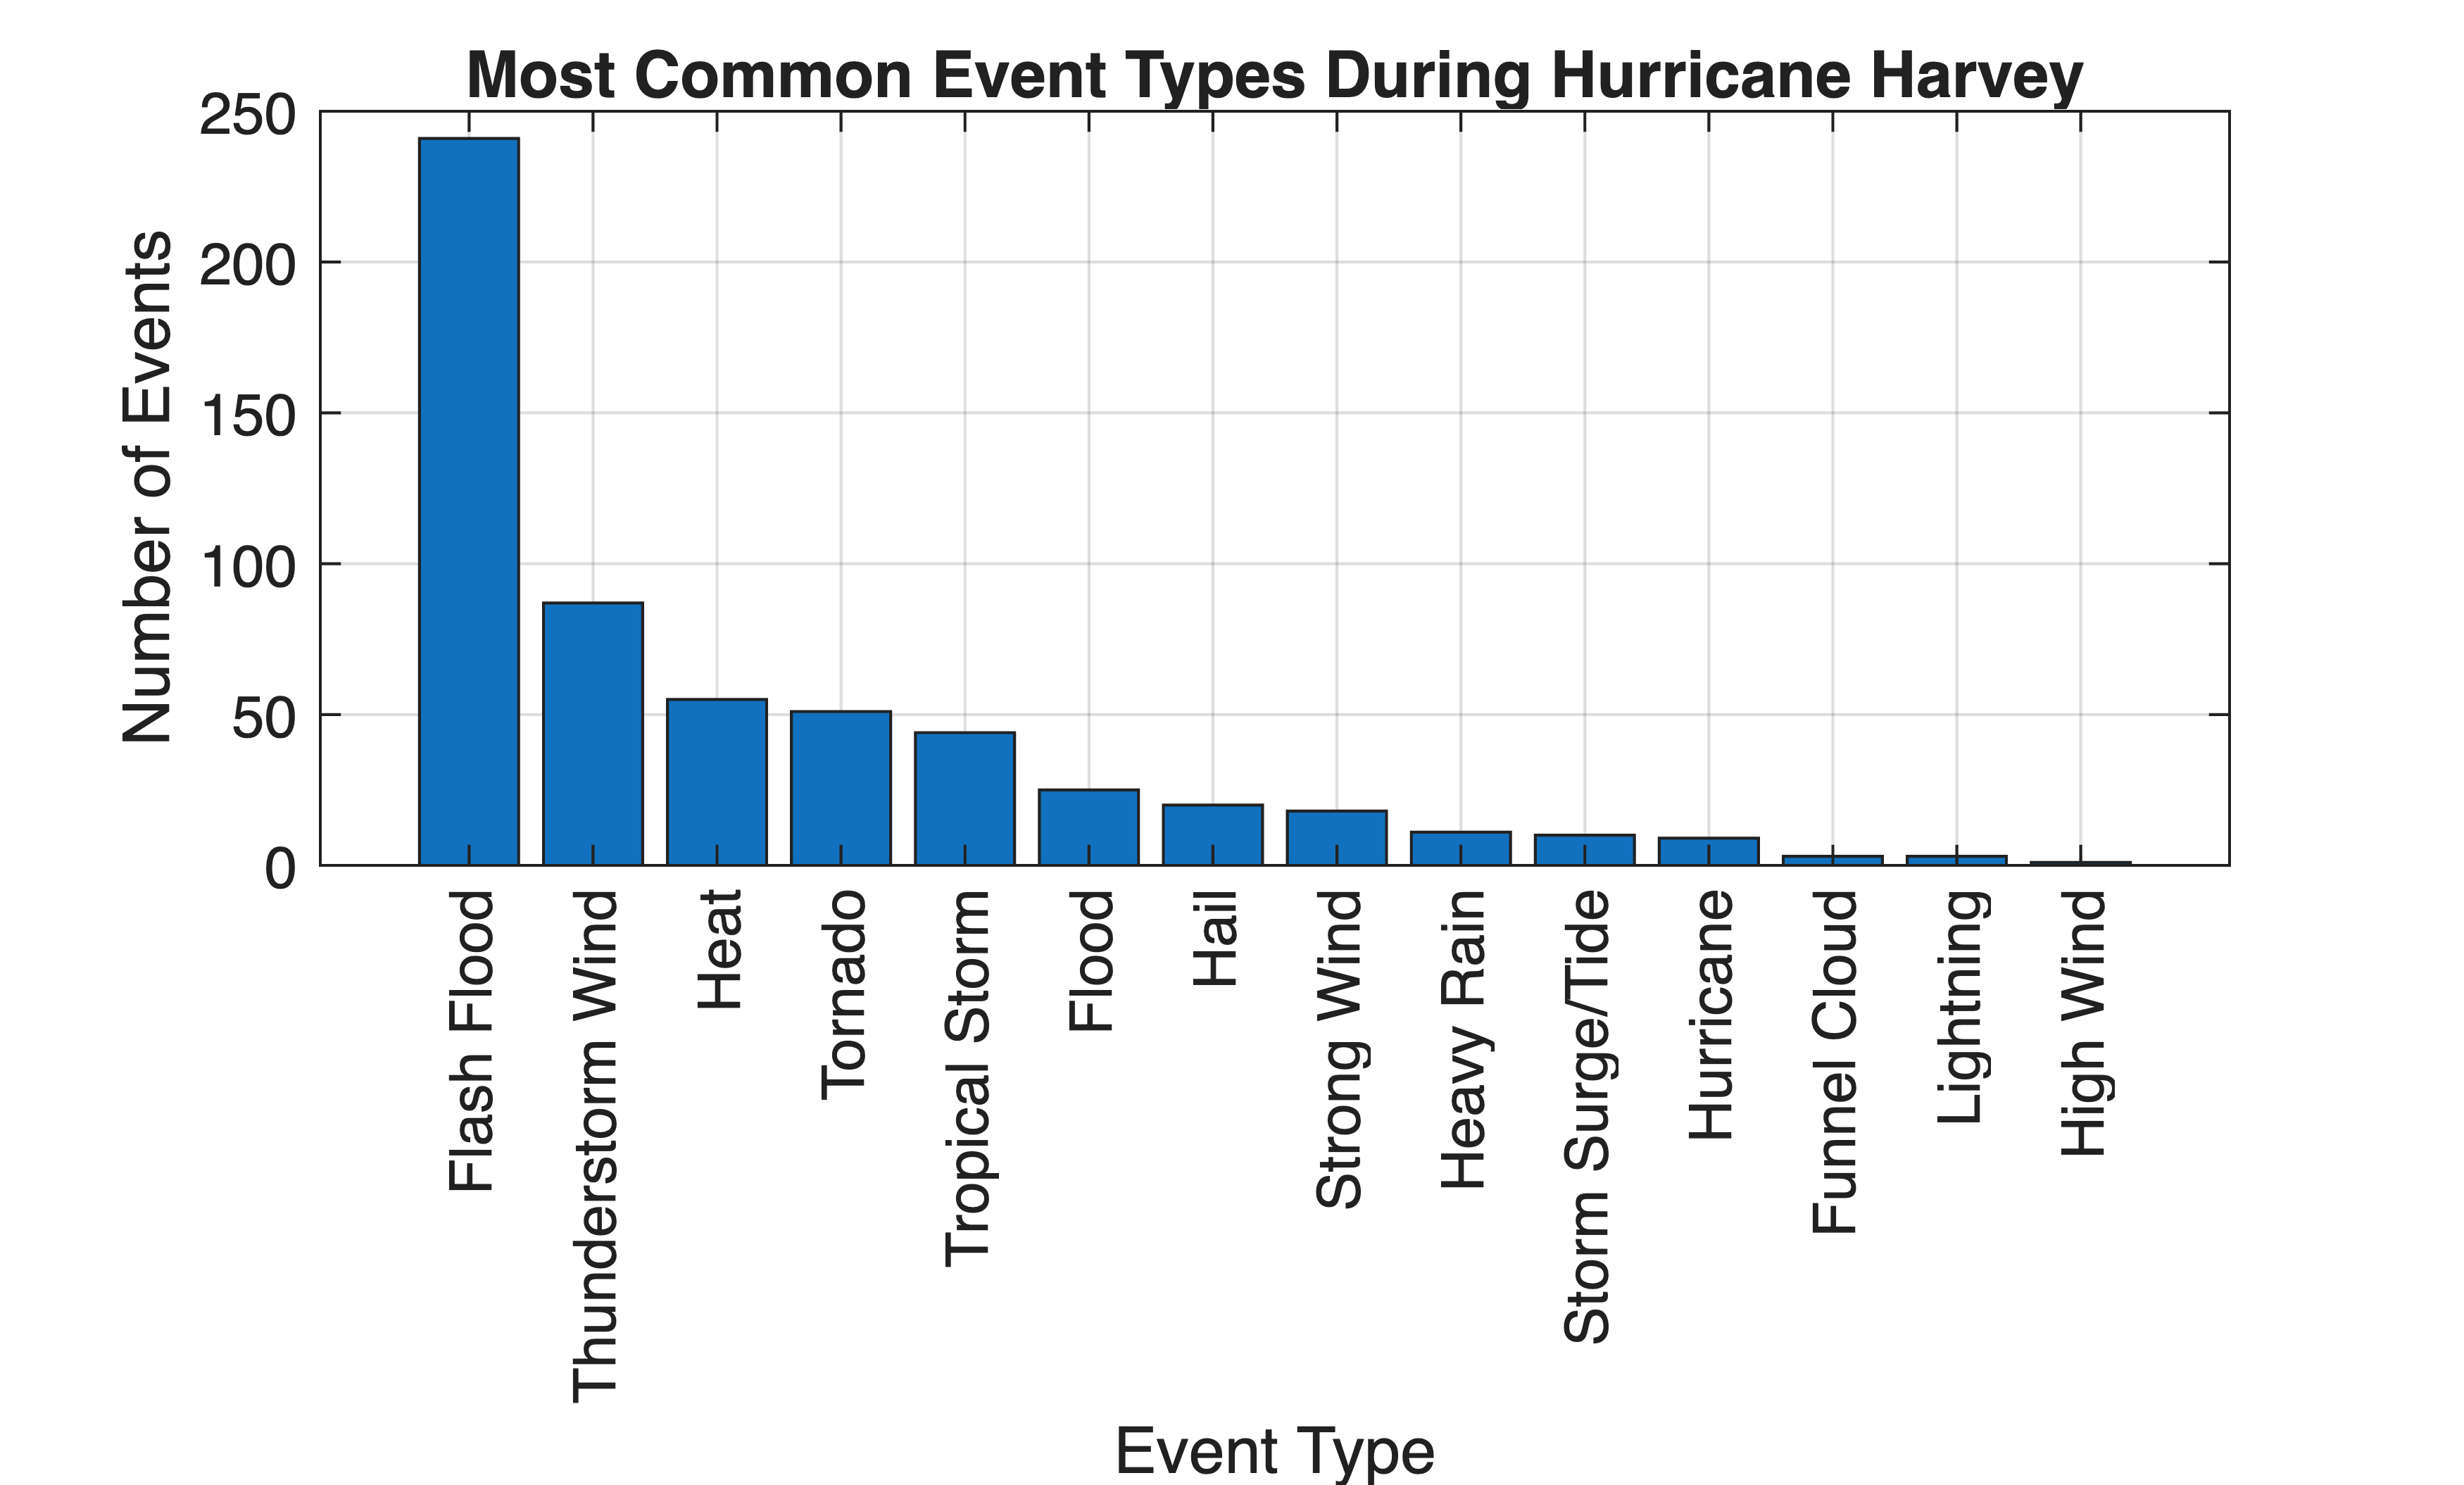

In [9]:
common_event_types = groupsummary(y_harvey, "Event_Type");
common_event_types = sortrows(common_event_types, "GroupCount", "descend");

% Bar chart
figure;
bar(common_event_types.GroupCount);
title('Most Common Event Types During Hurricane Harvey');
xlabel('Event Type');
ylabel('Number of Events');
xticklabels(common_event_types.Event_Type);
xtickangle(90); % Rotate labels for readability
grid on;